In [1]:
import pandas as pd
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#chargement des données
dfAlphaDigits = sio.loadmat("binaryalphadigs.mat")

In [3]:
#lire_alpha_digit
def lire_alpha_digit(dataset, listId):
    subsetData = dataset[listId,:].flatten()
    listImages = np.array([])

    for data in subsetData:
        listImages = np.append(listImages,data.flatten())
    
  
    output = np.array(listImages)

    return output

def lire_alpha_digit(dataset, list_idx):
  imgs_set = dataset[list_idx,:].flatten()
  imgs_flatten = []

  for img in imgs_set:
    imgs_flatten.append(img.flatten())
  
  imgs_set_output = np.array(imgs_flatten)

  return imgs_set_output

In [5]:
class RBMobject:
  def __init__(self, p, q):
    self.W = 0.01 * np.random.rand(p,q)
    self.a = np.zeros((1,p))
    self.b = np.zeros((1,q))
    
def init_RBM(p,q):
    rbm = RBMobject(p,q)
    rbm.W = 0.01 * np.random.rand(p,q)
    return rbm

In [6]:
def sigmoide(x):
    return 1/(1+np.exp(-x))

def entree_sortie_RBM(RBM, data):
    b = RBM.b.reshape(-1,1)
    W = RBM.W
    #n, p = data.shape

    sortie_RBM = 1/(1 + np.exp(- b.T - np.dot(data, W)))

    return sortie_RBM

In [7]:
  
def sortie_entree_RBM(RBM, output_values):
    W = RBM.W
    a = RBM.a.reshape(-1,1)
    #n, p = output_values.shape
    
    entree_RBM = 1/(1 + np.exp(- a.T - np.dot(output_values, W.T)))
    return entree_RBM
    

In [8]:
def train_RBM(RBM, nb_epochs, learning_rate, batch_size, data, q):
    MSE = []
    n = data.shape[0]
    p = data.shape[1]
    for i in range(0, nb_epochs):
        #shuffle
        np.random.shuffle(data)
        #batch iteration
        for batch in range(0, n, batch_size):
            indexX = np.arange(batch, min(batch + batch_size, n))
            data_batch = data[indexX, :]
            taille_batch = data_batch.shape[0]
            v_0 = data_batch
            p_h_v_0 = entree_sortie_RBM(RBM, v_0)
            #tirage suivant la loi
            h_0 = (np.random.rand(taille_batch, q) < p_h_v_0).astype(int)
            p_v_h_0 = sortie_entree_RBM(RBM, h_0)
            #tirage suivant la loi
            v_1 = (np.random.rand(taille_batch, p) < p_v_h_0).astype(int)
            p_h_v_1 = entree_sortie_RBM(RBM, v_1)
            
            #Gradient descent
            da = np.sum(v_0-v_1, axis = 0)/taille_batch
            db = np.sum(p_h_v_0 - p_h_v_1, axis=0)/taille_batch
            dW = (v_0.T @ p_h_v_0 - v_1.T @ p_h_v_1) / taille_batch
            
            RBM.a = RBM.a + learning_rate * da
            RBM.b = RBM.b + learning_rate * db
            RBM.W = RBM.W + learning_rate * dW
            
        #reconstruction de l'entrée
        h = entree_sortie_RBM(RBM, data)
        data_reconstr = sortie_entree_RBM(RBM, h)
        MSE.append(np.sum((data_reconstr - data)**2)/(n*p))
    return RBM, MSE

In [9]:
def generer_image_RBM(RBM, n_img, n_iter):

  p,q = RBM.W.shape


  for i in range(0, n_img):
    v = (np.random.rand(p) < 0.5).astype("int")
    for j in range(0,n_iter):
        p_h = entree_sortie_RBM(RBM, v)
        h = (np.random.rand(q)<p_h).astype('int')
        p_v = sortie_entree_RBM(RBM, h)
        v = (np.random.rand(p) < p_v).astype('int')

    plt.subplot(int(n_img/5), 5, i+1)
    plt.imshow(1-v.reshape(20,16), cmap='gray')
    plt.show()

  return v

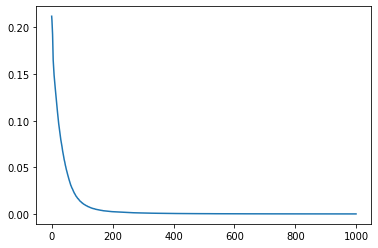

In [10]:


index = [17, 19]
data = lire_alpha_digit(dfAlphaDigits['dat'], index)
p = data.shape[1]
q = 200
nb_epochs = 1000
learning_rate = 0.1
batch_size = 10
rbm = RBMobject(p,q)
RBM, MSE = train_RBM(rbm, nb_epochs, learning_rate, batch_size, data, q)

plt.plot(MSE)
plt.show()

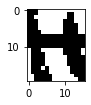

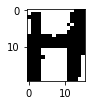

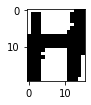

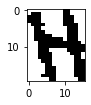

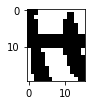

array([[1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1,
        1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
        0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
        0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
        0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
        1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
        1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0,
        0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
        1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 

In [11]:
generer_image_RBM(RBM, 5, 1000)

In [12]:
def init_DBN(nb_couches, couches):
    DBN = []
    for i in range(0, nb_couches):
        p = couches[i][0]
        q = couches[i][1]
        DBN.append(init_RBM(p,q))
    return DBN

In [13]:
def pretrainDBN(DBN, nb_iter, learning_rate, mini_batch_size, data):
    trainDBN = []
    nb_couches = len(DBN)
    for i in range(0, nb_couches):
        q = DBN[i].W.shape[1]
        train_RBMi, MSE = train_RBM(DBN[i], nb_iter, learning_rate, mini_batch_size, data, q)
        trainDBN.append(train_RBMi)
        data = entree_sortie_RBM(DBN[i], data)
    return trainDBN

In [231]:
def generer_img_DBN(preDBN, nb_iter_gibbs, nb_images, size):
    for i in range(0,nb_images):
        print(preDBN[-1])
        p = preDBN[-1].W.shape[0]
        generation = np.random.rand(1, p)
        outputImage = (generation < 0.5)
        
        for iteration in range(nb_iter_gibbs):
            probability = entree_sortie_RBM(preDBN[-1], outputImage)
            generation = np.random.rand(probability.shape[0], probability.shape[1])
            sortie = (generation < probability)
            probability = sortie_entree_RBM(preDBN[-1], sortie)
            generation = np.random.rand(probability.shape[0], probability.shape[1])
            outputImage = (generation < probability)
        
        for l in range(len(preDBN)-2, -1, -1):
            probability = sortie_entree_RBM(preDBN[l], outputImage)
            generation = np.random.rand(probability.shape[0], probability.shape[1])
            outputImage = (generation < probability)
        # afficher image 
        image_sortie = np.reshape(outputImage, size)
        plt.figure()
        plt.imshow(image_sortie)

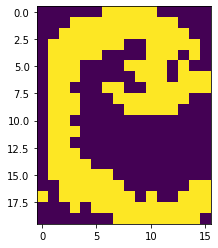

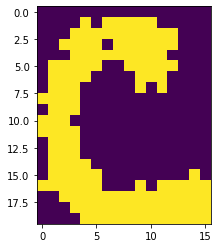

In [248]:
index = [12]
data = lire_alpha_digit(dfAlphaDigits['dat'], index)
p = data.shape[1]
q = 200
nb_epochs = 1000
learning_rate = 0.1
mini_batch_size = 10
nb_iter_gibbs = 100
nb_images = 2

image_x = 20
image_y = 16
shape = (image_x, image_y)
        
neurones = [(p, 50),(50, 20),(20, 10)]
nb_couches = len(neurones)

DBN = init_DBN(nb_couches, neurones)

trainDBN = pretrainDBN(DBN, nb_epochs, learning_rate, mini_batch_size, data)
generer_img_DBN(trainDBN, nb_iter_gibbs, nb_images, shape)

plt.show()